<a href="https://colab.research.google.com/github/a-nagar/vistra-beginner/blob/main/Python_Begin_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Classification Model

# Decision Tree Classifier on the Auto MPG dataset

We will try to predict the origin of a car based on other features



In [ ]:
cars = pd.read_csv("https://an-vistra.s3.us-west-1.amazonaws.com/data/auto-mpg.csv")

In [ ]:
X = cars[['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'size']]

In [ ]:
y = cars['origin']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)

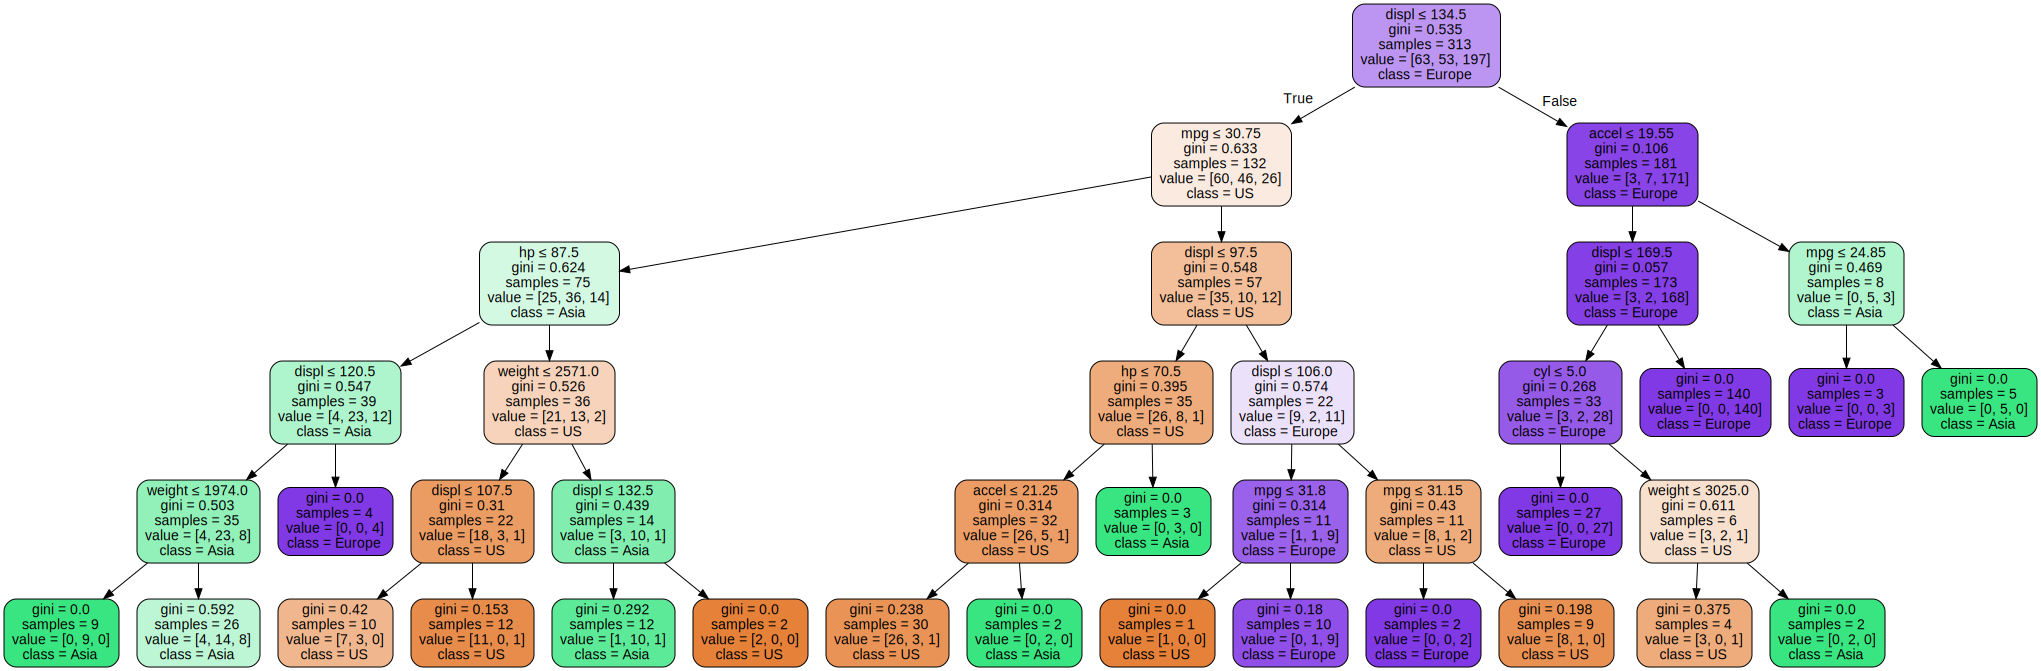

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,  
                     class_names=y.unique(),  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Asia       0.74      0.88      0.80        16
      Europe       0.60      0.60      0.60        15
          US       0.91      0.85      0.88        48

    accuracy                           0.81        79
   macro avg       0.75      0.78      0.76        79
weighted avg       0.82      0.81      0.81        79



# Application on the Asian Cuisines Dataset

In [ ]:
import pandas as pd
cuisines_df = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/cuisines.csv")
cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()

0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

In [ ]:
cuisines_label_df.value_counts()

indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64

In [ ]:
type(cuisines_label_df)

pandas.core.series.Series

In [ ]:
cuisine_labels_distinct = cuisines_label_df.unique()

In [ ]:
cuisine_labels_distinct

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [ ]:
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

[Text(0.4973958333333333, 0.9166666666666666, 'X[112] <= 0.5\ngini = 0.8\nsamples = 2796\nvalue = [537, 566, 565, 559, 569]'),
 Text(0.2916666666666667, 0.75, 'X[290] <= 0.5\ngini = 0.786\nsamples = 2311\nvalue = [534, 236, 563, 557, 421]'),
 Text(0.16666666666666666, 0.5833333333333334, 'X[185] <= 0.5\ngini = 0.786\nsamples = 2144\nvalue = [530, 236, 561, 397, 420]'),
 Text(0.08333333333333333, 0.4166666666666667, 'X[334] <= 0.5\ngini = 0.78\nsamples = 2000\nvalue = [526, 224, 551, 397, 302]'),
 Text(0.041666666666666664, 0.25, 'X[68] <= 0.5\ngini = 0.783\nsamples = 1787\nvalue = [368, 223, 538, 366, 292]'),
 Text(0.020833333333333332, 0.08333333333333333, 'gini = 0.753\nsamples = 1371\nvalue = [310, 142, 518, 196, 205]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.73\nsamples = 416\nvalue = [58, 81, 20, 170, 87]'),
 Text(0.125, 0.25, 'X[95] <= 0.5\ngini = 0.423\nsamples = 213\nvalue = [158, 1, 13, 31, 10]'),
 Text(0.10416666666666667, 0.08333333333333333, 'gini = 0.391\nsamples = 2

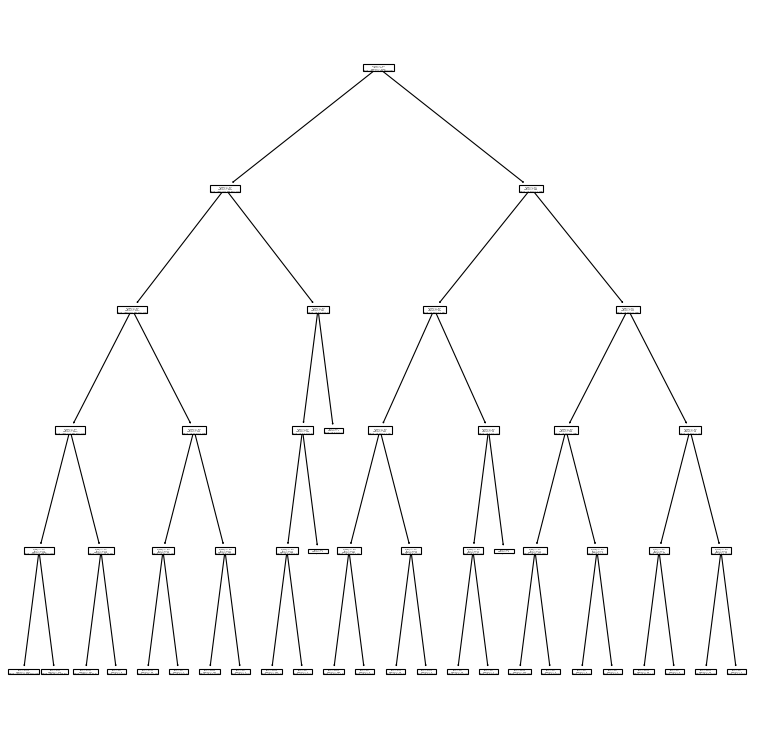

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 12), dpi=80)
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

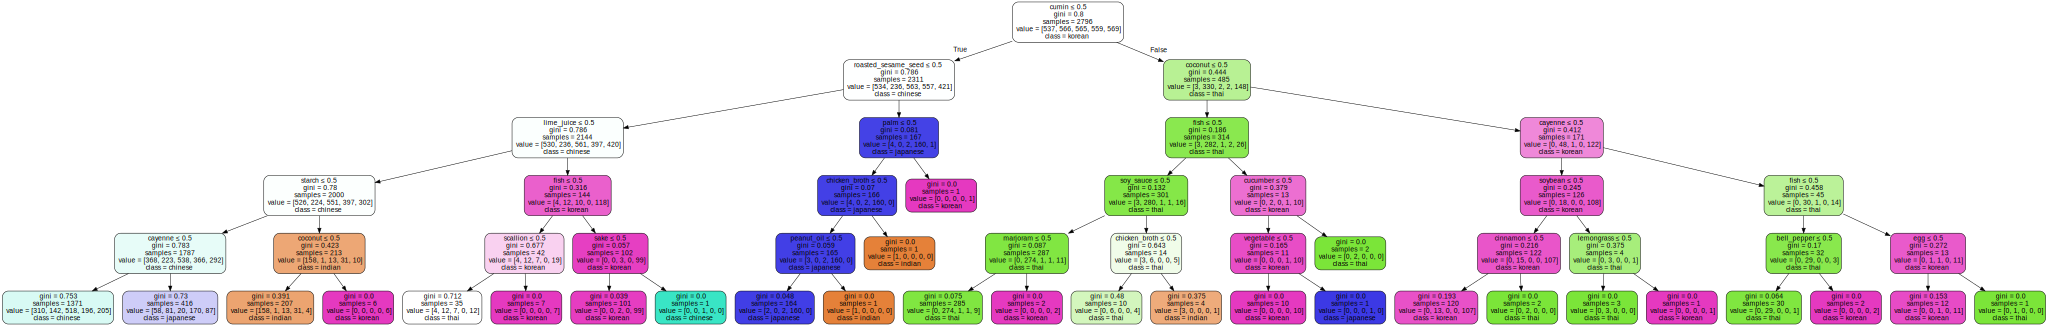

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=cuisines_feature_df.columns,  
                     class_names=cuisine_labels_distinct,  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.82      0.31      0.44       262
      indian       0.81      0.57      0.67       233
    japanese       0.37      0.88      0.52       234
      korean       0.58      0.60      0.59       240
        thai       0.83      0.44      0.58       230

    accuracy                           0.55      1199
   macro avg       0.68      0.56      0.56      1199
weighted avg       0.68      0.55      0.56      1199



In [ ]:
rf = RandomForestClassifier(max_depth=3, random_state=0, n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.82      0.47      0.60       262
      indian       0.76      0.84      0.80       233
    japanese       0.47      0.81      0.59       234
      korean       0.76      0.69      0.72       240
        thai       0.83      0.60      0.69       230

    accuracy                           0.68      1199
   macro avg       0.72      0.68      0.68      1199
weighted avg       0.73      0.68      0.68      1199

